<a href="https://colab.research.google.com/github/MayankRawat06/svm_parameter_optimization/blob/main/Occupancy_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data = read.csv('Occupancy_Estimation.csv')

In [2]:
dim(data)

[1] 10129    19

In [3]:
df <- data[sample(nrow(data), size=5000), ]

In [4]:
head(df)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
469,2017/12/22,15:18:46,25.81,25.88,25.69,26.31,13,17,80,50,0.08,0.05,0.06,0.06,630,-2.67307692,0,0,0
2722,2017/12/23,10:52:04,25.13,25.13,24.81,25.69,10,12,52,35,0.09,0.06,0.07,0.06,360,0.12307692,0,0,0
6410,2017/12/25,18:43:02,25.44,25.44,25.13,26.00,0,0,0,0,0.08,0.06,0.06,0.09,355,0.05384615,0,0,0
2869,2017/12/23,12:07:38,25.44,25.31,25.06,25.88,124,37,70,50,1.63,0.53,0.59,0.21,365,0.26153846,0,0,1
7491,2017/12/26,04:03:40,25.31,25.31,24.81,25.69,0,0,0,0,0.07,0.05,0.06,0.10,355,0.00000000,0,0,0
9815,2018/01/11,06:17:47,25.13,25.06,24.56,25.19,0,0,0,0,0.08,0.04,0.05,0.09,345,0.00000000,0,0,0


In [5]:
df$Date = NULL
df$Time = NULL

In [6]:
sapply(df, class)

S1_Temp              S2_Temp              S3_Temp 
           "numeric"            "numeric"            "numeric" 
             S4_Temp             S1_Light             S2_Light 
           "numeric"            "integer"            "integer" 
            S3_Light             S4_Light             S1_Sound 
           "integer"            "integer"            "numeric" 
            S2_Sound             S3_Sound             S4_Sound 
           "numeric"            "numeric"            "numeric" 
              S5_CO2         S5_CO2_Slope               S6_PIR 
           "integer"            "numeric"            "integer" 
              S7_PIR Room_Occupancy_Count 
           "integer"            "integer"

In [7]:
summary(df)

    S1_Temp         S2_Temp         S3_Temp         S4_Temp     
 Min.   :24.94   Min.   :24.75   Min.   :24.44   Min.   :24.94  
 1st Qu.:25.19   1st Qu.:25.19   1st Qu.:24.69   1st Qu.:25.44  
 Median :25.38   Median :25.38   Median :25.00   Median :25.75  
 Mean   :25.46   Mean   :25.55   Mean   :25.06   Mean   :25.76  
 3rd Qu.:25.63   3rd Qu.:25.63   3rd Qu.:25.38   3rd Qu.:26.00  
 Max.   :26.38   Max.   :29.00   Max.   :26.19   Max.   :26.50  
    S1_Light         S2_Light         S3_Light         S4_Light    
 Min.   :  0.00   Min.   :  0.00   Min.   :  0.00   Min.   : 0.00  
 1st Qu.:  0.00   1st Qu.:  0.00   1st Qu.:  0.00   1st Qu.: 0.00  
 Median :  0.00   Median :  0.00   Median :  0.00   Median : 0.00  
 Mean   : 25.72   Mean   : 25.75   Mean   : 34.18   Mean   :13.23  
 3rd Qu.: 12.00   3rd Qu.: 14.00   3rd Qu.: 50.00   3rd Qu.:22.00  
 Max.   :165.00   Max.   :258.00   Max.   :280.00   Max.   :74.00  
    S1_Sound        S2_Sound         S3_Sound         S4_Sound     
 

In [8]:
dim(df)

[1] 5000   17

In [9]:
sum(is.na(df))

[1] 0

In [10]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
df$Room_Occupancy_Count = as.factor(df$Room_Occupancy_Count)

In [12]:
library(caTools)

#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample.split(df$Room_Occupancy_Count, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)
train_target <- train$Room_Occupancy_Count
train_predictors <- train[, -which(names(train) == "Room_Occupancy_Count")]
test_target <- test$Room_Occupancy_Count
test_predictors <- test[, -which(names(test) == "Room_Occupancy_Count")]

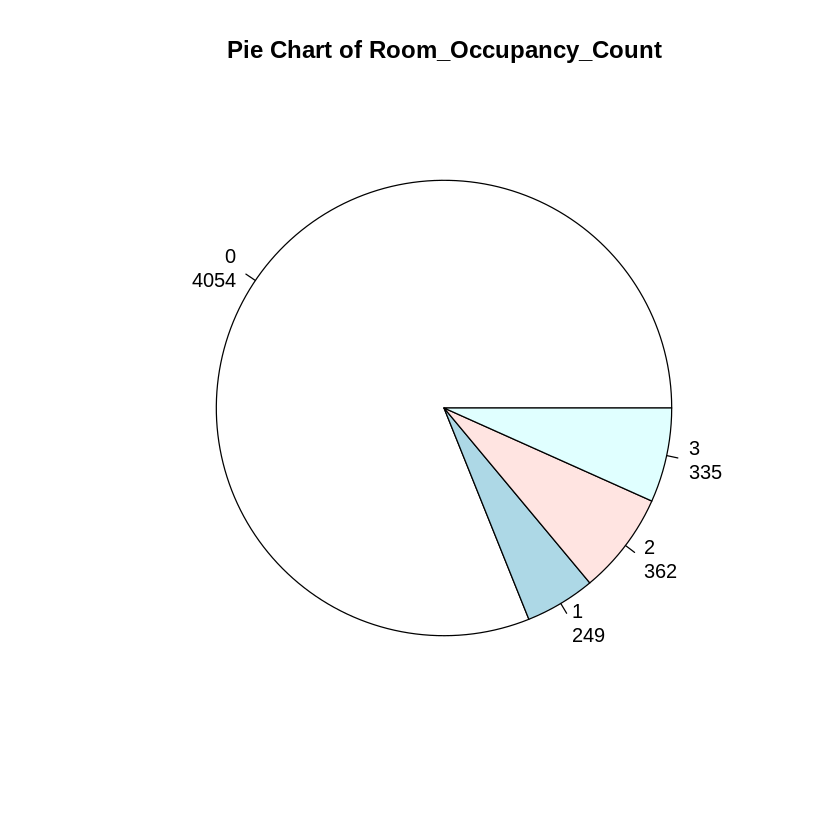

In [13]:
mytable <- table(df$Room_Occupancy_Count)
lbls <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable,
    labels = lbls,
    main="Pie Chart of Room_Occupancy_Count")

In [ ]:
install.packages("kernlab")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
library(kernlab)

In [15]:
bestAccuracy = 0
bestKernel = ""
bestNu = 0
bestEpsilon = 0
iteration = 1000
kernelList = c('rbfdot', 'polydot', 'vanilladot', 'tanhdot', 'laplacedot', 'anovadot')

In [16]:
columns = c("iteration","Accuracy","Kernal","Nu","Epsilon") 
result = data.frame(matrix(nrow = 0, ncol = length(columns))) 
colnames(result) = columns

In [17]:
result

iteration,Accuracy,Kernal,Nu,Epsilon
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>


In [18]:
fitnessFunction <- function(k,n,e){
  #k="Kernel" , n="Nu", e="Epsilon"
  # Model Building (Training)
  model = ksvm(Room_Occupancy_Count ~ .,data = train, kernel = k, nu = n, epsilon = e, kpar=list())
  # Prediction (Testing)
  test_predictions <- predict(model, test_predictors)
  # Model Evaluation: Accuracy
  accuracy <- round(mean(test_predictions == test_target) * 100, 2)
  return(accuracy)
}

In [19]:
for(i in 1 : iteration) {
  k = sample(kernelList, 1)
  n = runif(1)
  e = runif(1)
  Accuracy = fitnessFunction(k, n, e)
  
  if(Accuracy > bestAccuracy) {
    bestKernel = k
    bestNu = n
    bestEpsilon = e
    bestAccuracy = Accuracy
  }
  v = c(i, bestAccuracy, bestKernel, bestNu, bestEpsilon)
  result = rbind(result, v)
}

In [20]:
result

X.1.,X.99.4.,X.polydot.,X.0.317978880601004.,X.0.321120504522696.
<chr>,<chr>,<chr>,<chr>,<chr>
1,99.4,polydot,0.317978880601004,0.321120504522696
2,99.4,polydot,0.317978880601004,0.321120504522696
3,99.4,polydot,0.317978880601004,0.321120504522696
4,99.4,polydot,0.317978880601004,0.321120504522696
5,99.4,polydot,0.317978880601004,0.321120504522696
6,99.4,polydot,0.317978880601004,0.321120504522696
7,99.4,polydot,0.317978880601004,0.321120504522696
8,99.4,polydot,0.317978880601004,0.321120504522696
9,99.53,anovadot,0.0437531450297683,0.775772524066269


In [21]:
colnames(result) = c("iteration","BestAccuracy","BestKernal","BestNu","BestEpsilon") 

In [22]:
write.csv(result, "result.csv", row.names=FALSE)

In [23]:
sapply(result, class)

iteration BestAccuracy   BestKernal       BestNu  BestEpsilon 
 "character"  "character"  "character"  "character"  "character"

In [24]:
temp = result

In [25]:
temp$BestAccuracy = as.numeric(temp$BestAccuracy)
temp$iteration = as.numeric(temp$iteration)

In [26]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:kernlab’:

    alpha




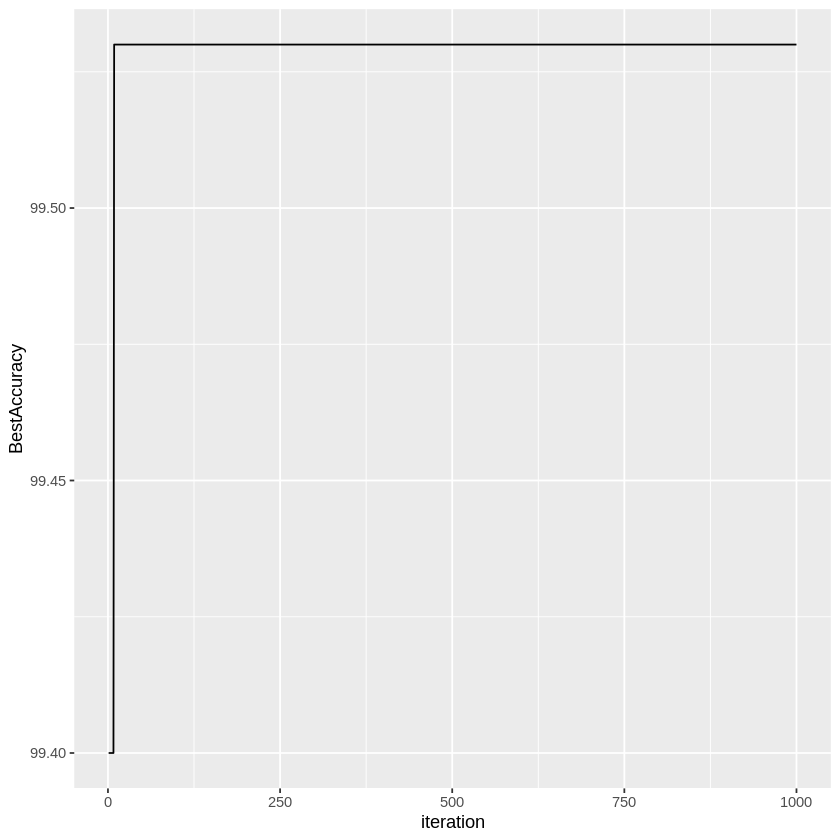

In [27]:
ggplot(temp, aes(x = iteration, y = BestAccuracy)) + geom_line()

In [28]:
ggsave("resultG.png")

Saving 6.67 x 6.67 in image


In [29]:
bestAccuracy

[1] 99.53

In [30]:
bestKernel

[1] "anovadot"

In [31]:
bestNu

[1] 0.04375315

In [32]:
bestEpsilon

[1] 0.7757725